
<div dir='rtl'>

#مستندات پروژه
در این پروژه از داده های بیماری کووید 19 استفاده شده است این دیتاست حاوی 488 سطر داده و 25 ستون می باشد برای پردازش این داده گام های زیر انجام می گیرد :

##گام اول : پیش پردازش داده ها 

**پیش پردازش داده ها در پایتون شامل مراحل زیر است :**
*  خواندن داده‌ها
* نمایش داده‌ها
* بررسی ویژگی‌های ستون‌ها
* تکرار مقادیر
* داده‌های بدون اطلاعات
* مواجهه با مقادیر غیر موجود و نامشخص
* تبدیل داده های رشته ای به عددی 

*  نرمال‌سازی


###مرحله 1: خواندن داده ها 
برای پردازش داده‌های جدولی در پایتون، دو کتابخانه بسیار مفید وجود دارد. اولین کتابخانه Pandas است. این کتابخانه، به تنهایی بسیاری از نیازمندی‌های ما را بر طرف می‌کند. کتابخانه دوم، کتابخانه مشهور scikit-learn است. برای برخی از پردازش‌ها ما از این کتابخانه استفاده می‌کنیم. برای استفاده از Pandas در پردازش‌ها، از کد زیر استفاده می‌کنیم.
</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

<div dir='rtl'>


برای خواندن داده‌ها از تابع read_csv موجود در Pandas استفاده می‌کنیم. ورودی این تابع، مسیر فایل csv است. خروجی آن یک DataFrame است که اطلاعات فایل csv در آن موجود است.

In [2]:
df = pd.read_csv('covid7.csv')

<div dir= 'rtl'>

### مرحله 2 :نمایش داده‌ها

برای نمایش داده‌ها، می‌توانیم متغیر data را چاپ کنیم. همچنین با کمک تابع head می‌توانیم چند سطر اول از data را چاپ کنیم 

In [3]:
df.head()


,#,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,class_label
0,1,19.0,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
1,2,28.0,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
2,3,40.0,no,yes,no,no,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
3,4,62.0,yes,yes,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
4,5,23.0,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes


<div dir = 'rtl'>

###  مرحله 3 :بررسی ویژگی‌های ستون‌ها

برای بررسی اولیه ستون‌ها، از دو تابع info و describe استفاده می‌کنیم. تابع info تعداد کل سطر‌ها و ستون‌ها را نشان می‌دهند و برای هر ستون، نوع داده آن را مشخص می‌کند. نکته مهم دیگر در این تابع، مشخص کردن تعداد داده‌های غیر null در هر ستون است. اگر تعداد داده‌های غیر null کمتر از تعداد سطر‌ها باشد، یعنی در آن ستون، داده null وجود دارد.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    487 non-null    int64  
 1   age                  128 non-null    float64
 2   Sleep_problems       487 non-null    object 
 3   Headache             486 non-null    object 
 4   Diarrhea             487 non-null    object 
 5   Abdominal_pain       487 non-null    object 
 6   body_pain            487 non-null    object 
 7   Body_discoloration   487 non-null    object 
 8   Cough                487 non-null    object 
 9   Fever                487 non-null    object 
 10  Ague                 487 non-null    object 
 11  Sore_throat          487 non-null    object 
 12  Fatigue              487 non-null    object 
 13  runny_nose           487 non-null    object 
 14  Chest_pain           487 non-null    object 
 15  Decreased_appetite   487 non-null    obj

<div dir='rtl'>

تابع **describe** ویژگی‌های آماری اولیه ستون‌ها را نشان می‌دهد.

 ویژگی **count** تعداد داده‌های غیر null را نشان‌ می‌دهد. برای ستون‌های رشته‌ای، ویژگی‌های **unique** و **top** و **freq** ارائه شده است. **unique** نشان‌دهنده تعداد داده‌های یکتا است. اگر این عدد با **count** برابر باشد، یعنی همه داده ها با هم فرق دارند. اگر تعداد داده‌های یکتا خیلی کم باشد، احتمالا داده‌ها از نوع دسته‌بندی هستند. **top** نشان‌دهنده داده‌ای است که بیشترین تکرار را داشته است و **freq،** تعداد تکرار آن داده را مشخص می‌کند.



In [5]:
df.describe(include="all")


,#,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,class_label
count,487.000000,128.000000,487,486,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487
unique,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
top,NaN,NaN,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
freq,NaN,NaN,436,283,410,450,267,462,249,282,445,341,280,394,426,380,471,423,449,326,380,425,479,487
mean,244.000000,36.523438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,140.729054,16.234970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,122.500000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,244.000000,33.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,365.500000,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div dir = 'rtl'>

برای اینکه ببینیم در چه ستون هایی مقدار null وجود دارد از تابع زیر استفاده می کنیم 
True نشاندهنده وجود داده null است. 
 
ستون های ***age*** , ***Headache*** دارای مقادیر null هستند.

In [6]:
df.isnull().any()


#                      False
age                     True
Sleep_problems         False
Headache                True
Diarrhea               False
Abdominal_pain         False
body_pain              False
Body_discoloration     False
Cough                  False
Fever                  False
Ague                   False
Sore_throat            False
Fatigue                False
runny_nose             False
Chest_pain             False
Decreased_appetite     False
Vomit                  False
Nausea                 False
Sneezing               False
Shortness_of_breath    False
Loss_of_smell          False
Loss_of_taste          False
urticaria              False
class_label            False
dtype: bool

<div dir='rtl'>

### مرحله 4: تکرار مقادیر

با استفاده از تابع **value_counts** می‌توانیم مقادیر و تعداد تکرار آن‌ها را ببینیم. برای مشاهده نموداری، از تابع plot بر روی خروجی value_counts استفاده می‌کنیم.

به طور مثال در اینجا تعداد تکرار مقادیر ***age***را   با دستور زیر می بینیم برای دیدن تعداد تکرار مقادیر سایر ستون ها می توان به جای ***age*** نام ستون های دیگر را بنویسیم.

23.0    8
45.0    6
25.0    6
27.0    5
28.0    5
30.0    5
22.0    5
39.0    4
51.0    4
20.0    4
26.0    4
19.0    3
18.0    3
37.0    3
32.0    3
56.0    3
35.0    3
33.0    3
46.0    3
36.0    3
34.0    3
40.0    3
76.0    2
62.0    2
41.0    2
48.0    2
70.0    2
52.0    2
55.0    2
50.0    2
49.0    2
17.0    2
44.0    2
43.0    2
31.0    2
15.0    1
10.0    1
3.0     1
68.0    1
57.0    1
2.0     1
85.0    1
54.0    1
59.0    1
67.0    1
29.0    1
14.0    1
95.0    1
Name: age, dtype: int64


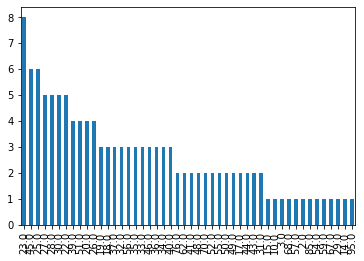

In [7]:
print(df['age'].value_counts())
df["age"].value_counts().plot(kind="bar")

<div dir= ' rtl'>

## مرحله 5: حذف داده‌های بدون اطلاعات
در برخی از موارد، یک ستون رشته ای دارای اطلاعات خاصی نیست. در اینصورت باید این ستون از داده‌ها حذف بشود.

در این دیتاست ستون **#** تنها نشاندهنده **شماره سطر** است و هیچ اطلاعات خاصی را نمی دهد بنابراین می توان آن را حذف کرد .

* با دستور زیر ستون # حذف خواهد شد.

In [8]:
df.drop("#", axis=1, inplace=True)
df

,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,class_label
0,19.0,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
1,28.0,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
2,40.0,no,yes,no,no,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
3,62.0,yes,yes,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
4,23.0,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,26.0,no,yes,no,no,no,no,yes,yes,yes,yes,yes,yes,no,no,no,yes,yes,no,no,no,no,yes
483,51.0,no,no,no,no,yes,yes,no,no,yes,yes,yes,no,yes,yes,no,no,no,yes,yes,yes,no,yes
484,32.0,no,no,no,no,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no,yes
485,30.0,no,no,no,no,yes,no,yes,yes,no,yes,yes,no,yes,no,no,no,yes,no,yes,yes,no,yes


<div dir = 'rtl'>

###مرحله 6: مواجهه با مقادیر غیر موجود و نامشخص
**مقادیر غیر موجود،** به صورت NaN خود را نشان می‌دهند. در مواجهه با این داده‌ها دو اقدام به صورت کلی انجام می‌شود:

**۱) حذف داده‌های NaN** 

**۲) استفاده و جایگزینی این داده‌ها.** 

اگر مقادیر از دست رفته در برخی از متغیرها از نوع داده کاملا از دست رفته باشد و تعداد مقادیر از دست رفته خیلی زیاد نباشد ، می توانیم به جای پر کردن و یا جایگزینی داده های گم شده آنها را حذف کنیم.


* **حذف کردن ستون**

اگر یک ستون مقادیر از دست رفته زیادی داشته باشد. در این حالت ، ستون را می توان به طور کامل حذف کرد. به عنوان یک قاعده کلی ، وقتی ۶۰-۷۰٪ مقادیر یک ستون وجود نداشته باشد آن را حذف می کنیم
در دیتاست ما از آنجایی که تنها 128 مورد از 487 مورد دارای مقدار غیر تهی هستند یعنی حدود 26% از داده های غیر تهی و مابقی ناموجود هستند بنابراین ترجیح ما بر حذف ستون **age** می باشد تا حذف نمونه های ناموجود .

برای حذف ستونی که داده NaN دارد، می‌توانیم از توابع **drop** و **pop** استفاده کنیم.

* **حذف سطر**

برای حذف سطری که دارای NaN است، از **dropna** استفاده می‌کنیم. در این تابع باید مشخص کنیم که در صورت وجود NaN در چه ستون‌هایی، آن سطر حذف بشود.
در ستون **Headache**  نیز مقدار null وجود دارد که به دلیل اینکه تنها یک سطر حاوی مقدار تهی است بنابراین بهتر است سطر حاوی null را حذف کنیم .


<div dir='rtl'>

* حذف ستون حاوی ***age***

* حذف سطر حاوی null در ستون **Headache**

* <div dir = 'rtl'>

به جای دستور ``` df.dropna(subset=["Headache"])```
 می توان از دستور ```df=df.dropna(axis=0)
``` نیز استفاده کرد .

با دستور فوق تمامی سطر های حاوی مقدار تهی در تمامی ستون ها حذف خواهد شد .

در خروجی می بینیم که هیچ مقدار از دست رفته در دیتاست نداریم و مقادیر همگی ستون ها از نظر داشتن مقدار null، false  می باشد.

In [9]:
df.drop("age", axis=1, inplace=True)
df.dropna(subset=["Headache"])
df=df.dropna(axis=0)

df

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,class_label
0,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
1,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
2,no,yes,no,no,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
3,yes,yes,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
4,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,no,yes,no,no,no,no,yes,yes,yes,yes,yes,yes,no,no,no,yes,yes,no,no,no,no,yes
483,no,no,no,no,yes,yes,no,no,yes,yes,yes,no,yes,yes,no,no,no,yes,yes,yes,no,yes
484,no,no,no,no,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no,yes
485,no,no,no,no,yes,no,yes,yes,no,yes,yes,no,yes,no,no,no,yes,no,yes,yes,no,yes


<div dir='rtl'>

سپس وجود یا عدم وجود مقدار null را چک می کنیم.

In [10]:
df.isnull().any()


Sleep_problems         False
Headache               False
Diarrhea               False
Abdominal_pain         False
body_pain              False
Body_discoloration     False
Cough                  False
Fever                  False
Ague                   False
Sore_throat            False
Fatigue                False
runny_nose             False
Chest_pain             False
Decreased_appetite     False
Vomit                  False
Nausea                 False
Sneezing               False
Shortness_of_breath    False
Loss_of_smell          False
Loss_of_taste          False
urticaria              False
class_label            False
dtype: bool

<div dir='rtl'>

#### مرحله 7 :حذف سطر های تکراری 

از آنجایی که در داده ممکن است سطر های تکراری داشته باشیم و این سطر های تکراری بر نتایج نیز تاثیر می گذارد بنابراین  باید سطر های تکراری را حذف کنیم تا نتایج را تحت تاثیر قرار ندهد.

 برای حذف سطرهای تکراری از دستور زیر استفاده می کنیم .
 دراین دستور جایی که اولین بار داده ظاهر شده است نگهداری می شود
 می توان آخرین داده ایجاد شده را نگهداری کرد که در اینجا فرض ما بر این است هر داده ای که زود تر آمده است باقی مانده و داده های بعدی به عنوان **duplicate** شناسایی شوند. 



In [11]:
 df = df.drop_duplicates(keep="first")
len(df)


286

<div dir='rtl'>

بنابراین با حذف سطر های تکرای و null مجموع سطر های ما به 286 خواهد رسید.

<div dir='rtl'>

###مرحله 8 : تبدیل داده های رشته ای به عددی 
گام بعدی تبدیل داده های رشته ای به داده های عددی است برای اینکار از دستورات زیر استفاده می کنیم.
. 

In [12]:
df.Sleep_problems = df.Sleep_problems.replace({'no':0, 'yes':1})
df.Headache = df.Headache.replace({'no':0, 'yes':1})
df.Diarrhea = df.Diarrhea.replace({'no':0, 'yes':1})
df.Abdominal_pain = df.Abdominal_pain.replace({'no':0, 'yes':1})
df.body_pain = df.body_pain.replace({'no':0, 'yes':1})
df.Body_discoloration = df.Body_discoloration.replace({'no':0, 'yes':1})
df.Cough = df.Cough.replace({'no':0, 'yes':1})
df.Fever = df.Fever.replace({'no':0, 'yes':1})
df.Ague = df.Ague.replace({'no':0, 'yes':1})
df.Sore_throat = df.Sore_throat.replace({'no':0, 'yes':1})
df.Fatigue = df.Fatigue.replace({'no':0, 'yes':1})
df.runny_nose = df.runny_nose.replace({'no':0, 'yes':1})
df.Chest_pain = df.Chest_pain.replace({'no':0, 'yes':1})
df.Decreased_appetite = df.Decreased_appetite.replace({'no':0, 'yes':1})
df.Vomit = df.Vomit.replace({'no':0, 'yes':1})
df.Nausea = df.Nausea.replace({'no':0, 'yes':1})
df.Sneezing = df.Sneezing.replace({'no':0, 'yes':1})
df.Shortness_of_breath = df.Shortness_of_breath.replace({'no':0, 'yes':1})
df.Loss_of_smell = df.Loss_of_smell.replace({'no':0, 'yes':1})
df.Loss_of_taste = df.Loss_of_taste.replace({'no':0, 'yes':1})
df.urticaria = df.urticaria.replace({'no':0, 'yes':1})
df.class_label = df.class_label.replace({'no':0, 'yes':1})


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,class_label
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1
483,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,1
484,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1
485,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1


<div dir='rtl'>

##مرحله 8: نرمالسازی داده ها
نرمال سازی یکی از تکنیک های مقیاس بندی ( Scaling )، نگاشت ( mapping ) در مرحله پیش پردازش ( preprocessing stage) در فرآیند داده کاوی است. در این روش می‌توانیم داده ها را از بازه فعلی آن به یک بازه دیگر نگاشت کنیم. این رویکرد می‌تواند کمک زیادی در اهداف پیش بینی و تجزیه و تحلیل های ما داشته باشد، بنابراین با توجه به تنوع مدل های پیش بینی در داده کاوی و به منظور حفظ این تنوع، تکنیک های نرمالسازی به ما کمک می‌کند تا این پیش بینی ها را به یکدیگر نزدیک کنیم. از جمله این تکنیک های نرمال سازی می‌توان به تکنیک Min-Max normalization، Z-score و Decimal scaling اشاره کرد

از آنجایی که داده های ما همگی بین 0 و یک قرار دارند بنابراین نیازی به نرمالسازی نداریم.

<div dir='rtl'>

### گام دوم : **ایجاد ترکیبات مختلف از ستون ها و برچسب گذاری** **آنها با** **false** 

از آنجایی که داده های ما همگی برچسب مثبت گرفته اند و باید برای آموزش داده های مثبت ومنفی داشته باشیم بنابراین برای به دست آوردن داده های منفی  تمامی ترکیبات مختلف از ستون ها را پیدا خواهیم کرد .

برای تولید ترکیبات مختلف داده ای از دستورات زیر استفاده می نماییم و 
  دیتا فریم از این مقادیر و بااین ستون ها ایجاد می کنیم.

  کاری که در قطعه کد زیر انجام می شود به این صورت است که نام ستون ها به همراه مقادیر معتبری که می پذیرند مشخص شده و سپس یک دیتا فریم با این مجموعه ساخته می شود نام دیتا فریم ایجاد شده result نام دارد 

In [14]:
from itertools import product
import pandas as pd


Sleep_problems=[0,1] 
Headache=[0,1]
Diarrhea=[0,1] 
Abdominal_pain=[0,1] 
body_pain=[0,1] 
Body_discoloration=[0,1]
Cough=[0,1]
Fever=[0,1]
Ague=[0,1]
Sore_throat=[0,1]
Fatigue=[0,1]
runny_nose=[0,1]
Chest_pain=[0,1]
Decreased_appetite=[0,1]
Vomit=[0,1]
Nausea=[0,1]
Sneezing=[0,1]
Shortness_of_breath=[0,1]
Loss_of_smell=[0,1]
Loss_of_taste=[0,1]
urticaria=[0,1]
class_label = [0]

result = pd.DataFrame(product(Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue
,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,class_label), 
columns=['Sleep_problems','Headache','Diarrhea','Abdominal_pain','body_pain','Body_discoloration',
                        'Cough','Fever','Ague','Sore_throat','Fatigue','runny_nose','Chest_pain',
                        'Decreased_appetite','Vomit','Nausea','Sneezing','Shortness_of_breath','Loss_of_smell','Loss_of_taste','urticaria','class_label'])


<div dir='rtl'>

در این بخش سطر های تکراری را با همان استراتژی قبلی حذف کرده و 1000 سطر از دیتا فریم result را نمایش می دهیم


In [15]:
result = result.drop_duplicates(keep="first")
result.head(1000)

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,class_label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0
996,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,1,0
998,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0


<div dir='rtl'>

 با این قطعه کد تعداد سطر های داده را به دست می آوریم.
در خروجی مشاهده می کنی که حدود 2 میلیون داده تولید شده است .
 


In [16]:
len(result)

2097152

<div dir='rtl'>

 **گام بعدی** ترکیب کردن دو دیتاست است که بادستور زیر اینکار را انجام می دهیم و دیتاست جدید ایجاد می نماییم.

  **df4 دیتاست جدید می باشد.**

In [17]:
frames = [df, result]

df4 = pd.concat(frames)

df4

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,class_label
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097147,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0
2097148,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2097149,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0
2097150,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


<div dir='rtl'>

### گام بعدی : مرتب سازی دیتاست

با دستور زیر دیتاست را براساس **class_label** مرتب می کنیم.

In [18]:
df4.sort_values("class_label")
df4.to_csv("covidi.csv",index=False)

<div dir='rtl'>

 * در این پروژه ما برای افزایش سرعت اجرای الگوریتمها بر روی دیتاست تنها به تعداد داده های مثبت داده های منفی را نگه می داریم یعنی تعداد سطر های داده ای برابر 572 خواهد شد.
و دیتاست ما حاوی 572 سطر خواهد بود.

 با دستور ```df6=df4.iloc[0:572] ``` دیتاست را با سطر های مشخص شده انتخاب می کنیم.  


In [19]:
df6=df4.iloc[0:572] # first 572 rows of dataframe
df6.sort_values("class_label")

df6

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,class_label
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0
282,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0
283,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0
284,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0


<div dir='rtl'>

 در این بخش دیتاست جدید ایجاد شده را با نام covidnew.csv ذخیره می نماییم.
  
  از این پس دیتاست مورد استفاده در طول اجرای پروژه   همین دیتاست می باشد 

In [20]:
df6.to_csv("covidnew.csv",index=False)

<div dir='rtl'>

اکنون مرحله **پیش پردازش داده ها** به پایان رسید و دیتاست تولید  شده شده فاقد مقادیر گم شده و سطر های تکرای می باشد و مرتب سازی شده است. 

در مرحله بعد به سراغ مرحله پردازش داده ها خواهی رفت.

<div dir ='rtl'>

# **مرحله پردازش داده**

#### **در این مرحله الگوریتم های یادگیری ماشین را بر روی دیتاست مناسب سازی شده اجرا می نماییم.**


* **درخت تصمیم**

  درخت تصمیم یکی(Decision tree )  از الگوریتم‌ های یادگیری ماشین است که در طبقه‌بندی آماری کاربرد دارند.

در آنالیز تصمیم، یک درخت تصمیم به عنوان ابزاری برای به تصویر کشیدن و آنالیز تصمیم، در جایی که مقادیر مورد انتظار از رقابت‌ها متناوباً محاسبه می‌شود، استفاده می‌گردد.

 یک درخت تصمیم دارای سه نوع گره‌است:

۱-گره تصمیم 

۲-گره تصادفی

۳-گره پایانی

در بخش زیر پیاده سازی درخت تصمیم بر روی دیتاست مورد نظر نشان داده شده است.

In [117]:
df7 = pd.read_csv('covidnew.csv')

In [118]:
x0= df7.iloc[:,0:21]
x=x0
y0=df7['class_label']
y=y0

In [119]:
# Create feature and target arrays
y = df7['class_label'].values
y = y.reshape(-1,1)
x_df7 = df7.drop(['class_label'],axis = 1)
x=x_df7
print(x_df7)

     Sleep_problems  Headache  ...  Loss_of_taste  urticaria
0                 1         1  ...              0          0
1                 1         1  ...              0          0
2                 0         1  ...              0          0
3                 1         1  ...              0          0
4                 1         1  ...              0          0
..              ...       ...  ...            ...        ...
567               0         0  ...              0          1
568               0         0  ...              1          0
569               0         0  ...              1          1
570               0         0  ...              0          0
571               0         0  ...              0          1

[572 rows x 21 columns]


<div dir='rtl'>

در این بخش **20درصد** از داده ها به عنوان تست و **80** **%** به عنوان train یا آموزش استفاده می شود.

و سپس تعداد سطر ها برای آموزش و تست مشخص خواهد شد



In [120]:
# Split into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=100)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


x_train:  (457, 21)
x_test:  (115, 21)
y_train:  (457, 1)
y_test:  (115, 1)


<div dir='rtl'>

از کتابخانه sklearn  کلاس درخت تصمیم را فراخوانی می کنیم .
و با استفاده از این کتابخانه آماده درخت تصمیم را رسم می کنیم و دقت الگوریتم را روی داده های تست هم به دست می آوریم

In [121]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train.ravel())
print("Decision Tree Algorithm test accuracy: ", dtree.score(x_test, y_test))

Decision Tree Algorithm test accuracy:  0.9826086956521739


<div dir='rtl'>

همانظور که در خروجی نشان داده شده است این الگوریتم **دقت** خوبی را نشان می دهد و یعنی در ***98 درصد*** مواقع پاسخ صحیح می دهد و تنها در حدود **2 درصد** پاسخ اشتباه خواهد داد

<div dir='rtl'>

* ## **الگوریتم بیز**

بیز ساده (Naïve Bayes) یک الگوریتم طبقه‌بندی ساده اما مؤثر و متداول یادگیری ماشین (Machine Learning) است که در دسته‌ی یادگیری با ناظر (Supervised Learning) جای می‌گیرد.

 * بیز ساده الگوریتمی احتمالی است که براساس نظریه‌ی بیز برای طبقه‌بندی استفاده می‌شود

 * این الگوریتم فرض می‌کند همه‌ی متغیرهای مجموعه‌ی داده‌ی ساده (Naïve) هستند، یعنی با یکدیگر ارتباط ندارند.

 *  پیاده‌سازی آن سریع و آسان است، اما بزرگ‌ترین عیب آن نیاز به مستقل‌بودن پیش‌بینی‌کننده‌ها یا همان ویژگی‌هاست؛ در دنیای واقعی ویژگی‌ها معمولاً به‌هم‌وابسته هستند که این عملکرد طبقه‌بندی‌کننده ضعیف می‌کند

 در زیر پیاده سازی این الگوریتم بر روی مجموعه دیتاست نشان داده شده است.

In [122]:
df7 = pd.read_csv('covidnew.csv')

In [123]:
# Create feature and target arrays
y = df7['class_label'].values
y = y.reshape(-1,1)
x_df7 = df7.drop(['class_label'],axis = 1)
x=x_df7
print(x_df7)

     Sleep_problems  Headache  ...  Loss_of_taste  urticaria
0                 1         1  ...              0          0
1                 1         1  ...              0          0
2                 0         1  ...              0          0
3                 1         1  ...              0          0
4                 1         1  ...              0          0
..              ...       ...  ...            ...        ...
567               0         0  ...              0          1
568               0         0  ...              1          0
569               0         0  ...              1          1
570               0         0  ...              0          0
571               0         0  ...              0          1

[572 rows x 21 columns]


<div dir='rtl'>

در این بخش 20درصد از داده ها به عنوان تست و 80 % به عنوان train یا آموزش استفاده می شود.

و سپس تعداد سطر ها برای آموزش و تست مشخص خواهد شد

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=100)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (457, 21)
x_test:  (115, 21)
y_train:  (457, 1)
y_test:  (115, 1)


<div dir= 'rtl'>

از کتابخانه sklearn  کلاس naive bayes را فراخوانی می کنیم .
 دقت الگوریتم را روی داده های تست  به دست می آوریم

In [125]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train.ravel())
print("Naive Bayes test accuracy: ", nb.score(x_test, y_test))

Naive Bayes test accuracy:  1.0


<div dir='rtl'>

همانطور که در خروجی نشان داده شده است دقت این الگوریتم **100**% می باشد که این نشان می دهد این الگوریتم همیشه درست پیش بینی می کند.

<div dir='rtl'>

 * ## **الگوریتمID3**

الگوریتم اصلی ساختن درختان تصمیم گیری به نام ID3 توسط J. R. Quinlan که از جستجوی حریصانه از بالا به پایین و حریصانه در فضای شاخه های احتمالی و بدون برگشت استفاده می کند. ID3 از Entropy و Information Gain برای ساخت درخت تصمیم استفاده می کند.

آنتروپی
یک درخت تصمیم گیری از بالا به پایین از یک گره ریشه ساخته شده است و شامل تقسیم داده ها به زیر مجموعه هایی است که حاوی نمونه هایی با مقادیر مشابه (همگن) هستند. الگوریتم ID3 از آنتروپی برای محاسبه همگن یک نمونه استفاده می کند. اگر نمونه کاملاً همگن باشد ، آنتروپی صفر است و اگر نمونه تقسیم به همان اندازه باشد ، آنتروپی یک دارد.

In [126]:
import pandas as pd
import math


# function to calculate the entropy of entire dataset
def base_entropy(dataset):
    p = 0
    n = 0
    target = dataset.iloc[:, -1]
    targets = list(set(target))
    for i in target:
        if i == targets[0]:
            p = p + 1
        else:
            n = n + 1
    if p == 0 or n == 0:
        return 0
    elif p == n:
        return 1
    else:
        entropy = 0 - (
            ((p / (p + n)) * (math.log2(p / (p + n))) + (n / (p + n)) * (math.log2(n / (p + n)))))
        return entropy


In [127]:
# function to calculate the entropy of attributes
def entropy(dataset, feature, attribute):
    p = 0
    n = 0
    target = dataset.iloc[:, -1]
    targets = list(set(target))
    for i, j in zip(feature, target):
        if i == attribute and j == targets[0]:
            p = p + 1
        elif i == attribute and j == targets[1]:
            n = n + 1
    if p == 0 or n == 0:
        return 0
    elif p == n:
        return 1
    else:
        entropy = 0 - (
            ((p / (p + n)) * (math.log2(p / (p + n))) + (n / (p + n)) * (math.log2(n / (p + n)))))
        return entropy



In [128]:
# a utility function for checking purity and impurity of a child
def counter(target, attribute, i):
    p = 0
    n = 0
    targets = list(set(target))
    for j, k in zip(target, attribute):
        if j == targets[0] and k == i:
            p = p + 1
        elif j == targets[1] and k == i:
            n = n + 1
    return p, n

In [129]:
# function that calculates the information gain
def Information_Gain(dataset, feature):
    Distinct = list(set(feature))
    Info_Gain = 0
    for i in Distinct:
        Info_Gain = Info_Gain + feature.count(i) / len(feature) * entropy(dataset, feature, i)
    Info_Gain = base_entropy(dataset) - Info_Gain
    return Info_Gain


# -----------------------------------------------------------------------

# function that generates the childs of selected Attribute

def generate_childs(dataset, attribute_index):
    distinct = list(dataset.iloc[:, attribute_index])
    childs = dict()
    for i in distinct:
        childs[i] = counter(dataset.iloc[:, -1], dataset.iloc[:, attribute_index], i)
    return childs



# function that modifies the dataset according to the impure childs
def modify_data_set(dataset,index, feature, impurity):
    size = len(dataset)
    subdata = dataset[dataset[feature] == impurity]
    del (subdata[subdata.columns[index]])
    return subdata




# function that return attribute with the greatest Information Gain
# -----------------------------------------------------------------------
def greatest_information_gain(dataset):
    max = -1
    attribute_index = 0
    size = len(dataset.columns) - 1
    for i in range(0, size):
        feature = list(dataset.iloc[:, i])
        i_g = Information_Gain(dataset, feature)
        if max < i_g:
            max = i_g
            attribute_index = i
    return attribute_index


# function to construct the decision tree
def construct_tree(dataset, tree):
    target = dataset.iloc[:, -1]
    impure_childs = []
    attribute_index = greatest_information_gain(dataset)
    childs = generate_childs(dataset, attribute_index)
    tree[dataset.columns[attribute_index]] = childs
    targets = list(set(dataset.iloc[:, -1]))
    for k, v in childs.items():
        if v[0] == 0:
            tree[k] = targets[1]
        elif v[1] == 0:
            tree[k] = targets[0]
        elif v[0] != 0 or v[1] != 0:
            impure_childs.append(k)
    for i in impure_childs:
        sub = modify_data_set(dataset,attribute_index, dataset.columns[attribute_index], i)
        tree = construct_tree(sub, tree)
    return tree


# main function
# -----------------------------------------------------------------------
def main():
    df = pd.read_csv("covidnew.csv")
    tree = dict()
    result = construct_tree(df, tree)
    for key, value in result.items():
        print(key, " => ", value)


# -----------------------------------------------------------------------

if __name__ == "__main__":
    main()

Fever  =>  {0: (286, 122), 1: (0, 164)}
1  =>  1
body_pain  =>  {1: (0, 61), 0: (286, 61)}
Cough  =>  {1: (0, 26), 0: (286, 35)}
Headache  =>  {1: (0, 13), 0: (286, 22)}
Fatigue  =>  {1: (0, 8), 0: (286, 14)}
runny_nose  =>  {1: (0, 5), 0: (286, 9)}
Sore_throat  =>  {0: (286, 7), 1: (0, 2)}
urticaria  =>  {0: (143, 7), 1: (143, 0)}
Sneezing  =>  {0: (72, 7), 1: (71, 0)}
Vomit  =>  {0: (40, 7), 1: (32, 0)}
Nausea  =>  {0: (24, 7), 1: (16, 0)}
Chest_pain  =>  {0: (16, 7), 1: (8, 0)}
Decreased_appetite  =>  {0: (8, 6), 1: (8, 1)}
Diarrhea  =>  {0: (1, 1)}
Loss_of_taste  =>  {0: (1, 1), 1: (1, 0)}
Sleep_problems  =>  {0: (1, 1)}
Abdominal_pain  =>  {0: (1, 1)}
Body_discoloration  =>  {0: (1, 1)}
Ague  =>  {0: (1, 1)}
Shortness_of_breath  =>  {0: (4, 1), 1: (4, 0)}
Loss_of_smell  =>  {0: (2, 1), 1: (2, 0)}
class_label  =>  {1: (0, 1), 0: (1, 0)}
0  =>  0


<div dir='rtl'>

* ## **الگوریتم knn**

در الگوریتم knn مراحل زیر انجام می شود:

* الگوریتم k نزدیکترین همسایه از بسته scikit-learn وارد شده است.

* متغیرهای feaure , target را ایجاد می کنیم .
* داده ها را به داده های آموزشی و آزمایشی تقسیم کنید.
* یک مدل k-NN با استفاده از مقدار همسایگان ایجاد می کنیم.
* داده ها را آموزش داده یا در مدل قرار می دهیم.
* پیشبینی آینده.




/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

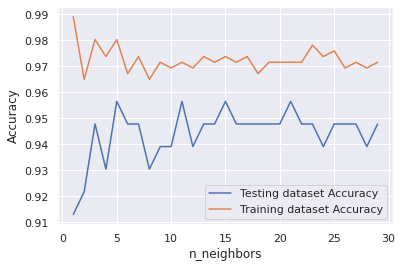

In [131]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

df7 = pd.read_csv('covidnew.csv')
# Create feature and target arrays
x0= df7.iloc[:,0:21]
X=x0
y0=df7['class_label']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=100)

neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	
	# Compute training and test data accuracy
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


<div dir='rtl'>

همانطور که در خروجی نمایش داده شده است دقت داده های آموزشی و آزمایشی در k=1 مقدار 91% و 99% می باشد .
هر چه مقدار k افزایش می یابد دقت هم در داده های آموزشی و هم آزمایشی کاهش می یابد از تقریبا k= 10  دقت داده های آموزشی ثابت مانده  و مقدار95% را خواهد داشت ولی داده های آزمایشی تقریبا از k=10 به بعد بین مقادی 97% و 98% در نوسان است.
 همانطور که می بینیم دقتی این روش کمی از روش درخت تصمیم کمتر است.

<div dir='rtl'>

* ## **الگوریتم Find-S**


الگوریتم **find-S** یک الگوریتم یادگیری مفاهیم پایه در یادگیری ماشینی است.

 الگوریتم find-S خاص ترین فرضیه را پیدا می کند که با تمام مثال های مثبت مطابقت دارد. در اینجا باید توجه داشته باشیم که الگوریتم فقط آن نمونه های آموزشی مثبت را در نظر می گیرد. الگوریتم find-S با خاص ترین فرضیه شروع می شود و هر بار که نتواند داده های آموزشی مثبت مشاهده شده را طبقه بندی کند، این فرضیه را تعمیم می دهد. از این رو، الگوریتم Find-S از خاص ترین فرضیه به کلی ترین فرضیه حرکت می کند

 **مراحل اجرای الگوریتم :**

* با خاص ترین فرضیه شروع کنید.
h = {ϕ، ϕ، ϕ، ϕ، ϕ، ϕ}
* مثال بعدی را در نظر بگیرید و اگر منفی باشد، هیچ تغییری در فرضیه ایجاد نمی شود.
* اگر مثال مثبت باشد و متوجه شدیم که فرضیه اولیه ما خیلی خاص است، فرضیه فعلی خود را به یک شرایط عمومی به روز می کنیم.
* مراحل بالا را تا کامل شدن تمام مثال های آموزشی تکرار کنید.
* پس از تکمیل تمام مثال های آموزشی، فرضیه نهایی را خواهیم داشت که چه زمانی می توان برای طبقه بندی نمونه های جدید استفاده کرد.

In [132]:
import csv
a = []
with open('covidnew.csv', 'r') as csvfile:
    next(csvfile)
    for row in csv.reader(csvfile):
        a.append(row)
    print(a)

print("\nThe total number of training instances are : ",len(a))

num_attribute = len(a[0])-1

print("\nThe initial hypothesis is : ")
hypothesis = ['ϕ']*num_attribute
print(hypothesis)

for i in range(0, len(a)):
    if a[i][num_attribute] == '1':
        print ("\nInstance ", i+1, "is", a[i], " and is Positive Instance")
        for j in range(0, num_attribute):
            if hypothesis[j] == 'ϕ' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

    if a[i][num_attribute] == '0':
        print ("\nInstance ", i+1, "is", a[i], " and is Negative Instance Hence Ignored")
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

print("\nThe Maximally specific hypothesis for the training instance is ", hypothesis)


[['1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1'], ['1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1'], ['0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1'], ['1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1'], ['1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1'], ['0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1'], ['0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1'], ['1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1'], ['0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

<div dir='rtl'>

* ## **الگوریتم candidate Elimination**

در این الگوریتم فضای مدل توسط خاص ترين (اختصاصی ترين) و عام ترين (کلی ترين) عضوهايش نمايش
داده می شود


با مقداردهی اوليه ی فضای مدل با مجموعه ی همه فرضيه های  Hآغاز می شود. يعنی با
مقداردهی کران عام  G0با عام ترين فرضيه در ( ،Hکف مطلق) و
مقداردهی کران خاص  S0با خاص ترين فرضيه در ( ،Hسقف مطلق)
اين  2مجموعه ی کرانی، کل فضای فرضيه را محدود و معين می کند، زيرا مابقی فرضيه های
موجود در  ،Hکلی تر از  S0و خاص تر از  G0است
توجه: با وارسی هر مثال آموزشی، مجموعه های کرانی  S0و  G0به مرور تعميم يافته تر و
اختصاصی تر می شود،
متعاقباً: فرضيه هايی که با مثال های جديدِ مشاهده شده، ناسازگار است از فضای
مدل حذف می شود
در انتها: بعد از بررسی تمامی مثال های آموزشی، فضای مدلِ حاصل، حاوی تمامی فرضيه های
سازگار با اين مثال ها و فقط همين فرضيه ها (… ,  )h1 , h2 , h3 , h4خواهد بود

In [133]:
import numpy as np 
import pandas as pd

data = pd.read_csv('covidnew.csv')
concepts = np.array(data.iloc[:,0:-1])
print("\nInstances are:\n",concepts)
target = np.array(data.iloc[:,-1])
print("\nTarget Values are: ",target)

def learn(concepts, target): 
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and genearal_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)  

    for i, h in enumerate(concepts):
        print("\nInstance", i+1 , "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)): 
                if h[x]!= specific_h[x]:                    
                    specific_h[x] ='?'                     
                    general_h[x][x] ='?'
                   
        if target[i] == "no":            
            print("Instance is Negative ")
            for x in range(len(specific_h)): 
                if h[x]!= specific_h[x]:                    
                    general_h[x][x] = specific_h[x]                
                else:                    
                    general_h[x][x] = '?'        
        
        print("Specific Bundary after ", i+1, "Instance is ", specific_h)         
        print("Generic Boundary after ", i+1, "Instance is ", general_h)
        print("\n")

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]    
    for i in indices:   
        general_h.remove(['?', '?', '?', '?', '?', '?']) 
    return specific_h, general_h 

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")


Instances are:
 [[1 1 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 1]]

Target Values are:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

<div dir='rtl'>

* ## **الگوریتم k-means**

این الگوریتم به کاربر کمک می‌کند تا با داده‌های فاقد برچسب کار کند (مجموعه داده‌ای که فاقد برچسب کلاس است). خوشه بندی K-Means در دسته الگوریتم‌های خوشه‌بندی مبتنی بر  (Centroid) قرار می‌گیرد. مرکز، یک نقطه داده (تخیلی یا واقعی) در مرکز خوشه است. در خوشه‌بندی مبتنی بر مرکز، خوشه‌ها به وسیله یک بردار ارائه می‌شوند. این مرکز الزاما عضو مجموعه داده نیست. خوشه‌بندی مبتنی بر مرکز، یک «الگوریتم تکرار شونده» (Iterative Algorithm) است که مشابهت در آن بر اساس نزدیک بودن نقطه داده به به مرکز خوشه تعیین می‌شود.



In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [135]:
df7 = pd.read_csv('covidnew.csv')
df7.head()

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,class_label
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [136]:
df7.class_label.value_counts()

1    286
0    286
Name: class_label, dtype: int64

In [137]:
df7.drop("class_label", axis=1, inplace=True)
df7

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
568,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0
569,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1
570,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0


In [138]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(df7)
kmeans.cluster_centers_

array([[ 1.41791045e-01,  4.77611940e-01,  1.90298507e-01,
         1.23134328e-01,  5.22388060e-01,  8.20895522e-02,
         5.29850746e-01,  6.08208955e-01,  1.41791045e-01,
         3.91791045e-01,  4.47761194e-01,  2.64925373e-01,
         1.90298507e-01,  2.79850746e-01,  4.10447761e-02,
         1.82835821e-01,  1.38059701e-01,  3.39552239e-01,
         2.94776119e-01,  1.82835821e-01,  2.98507463e-02],
       [ 3.28947368e-03,  3.28947368e-03,  3.28947368e-03,
         6.57894737e-03,  6.57894737e-03,  8.32667268e-17,
         3.28947368e-03,  3.28947368e-03, -1.11022302e-16,
         6.57894737e-03,  1.31578947e-02,  9.86842105e-03,
         1.05263158e-01,  4.47368421e-01,  4.34210526e-01,
         4.40789474e-01,  4.70394737e-01,  4.86842105e-01,
         4.96710526e-01,  4.86842105e-01,  4.70394737e-01]])

In [139]:
df7['label']=kmeans.labels_
df7

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,label
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1
568,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1
569,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1
570,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1


In [140]:
df7.label.value_counts()

1    304
0    268
Name: label, dtype: int64

<div dir='rtl'>

همانطور که می بینیم الگوریتم k-means  304 سطر را 0 و 268 سطر را 1 برچسب گذاری کرده استکه این نشان می دهد این الگوریتم تا حدود زیادی خوب عملکرده است.
چون نحوه دسته بندی اولیه 286 مورد 1 و 286مورد 0 بوده است

<div dir='rtl'>

از آنجایی که k-means یک روش خوشه بندی است (نه طبقه بندی)، دقت نباید ارزیابی شود. این به این دلیل است که ما مدل را با داده های برچسب کلاس آموزش نمی دهیم و بنابراین بین برچسب های کلاس واقعی و برچسب های کلاس پیش بینی شده ناسازگاری وجود خواهد داشت.

<div dir='rtl'>

**5 ویژگی که کمترین اهمیت را دارند** 
براساس مشاهدات ستون های age , # دارای اهمیت کمی هستند که میتوان آنها را حذف کرد .براساس درخت تصمیم رسم شده در نرم افزار rapid miner  و با مشاهده وزن ها ی ویژگیها مشاهده شد که 5 ویژگی  که کمترین اهمیت را دارند  
 که عبارتند از chest_pain, shortness_of_breath, Decreese_appetite , loss of smell,body_discoloration,....


 ![result](result.png)

<div dir='rtl'>

**حانیه احمدیان**